In [15]:
import requests
from bs4 import BeautifulSoup

In [54]:
URL = "https://weather.com/en-IN/weather/tenday/l/aff9460b9160c73ff01769fd83ae82cf37cb27fb7eb73c70b91257d413147b69"

In [55]:
page = requests.get(URL)
page

<Response [200]>

b'<!doctype html>\n<html lang="en-IN" itemScope itemType="http://schema.org/Organization" prefix="fb: http://ogp.me/ns/fb# og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product#" dir="ltr" data-device-class="desktop" data-connection-speed="4g"><head itemScope itemType="http://schema.org/WebSite"><meta charSet="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0, viewport-fit=cover"><script charSet="UTF-8">window.loadNewRelic=false;(function(){var rNumber=Math.random();if(rNumber>=0.95){window.loadNewRelic=true;}if(window.loadNewRelic){window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o
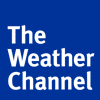
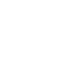
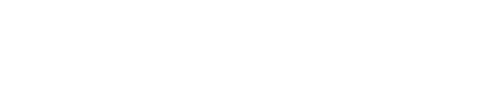

In [56]:
page.content

In [57]:
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find("table",class_="twc-table")

In [90]:
Day=[]
Description=[]
Temperature=[]
Precip=[]
Wind=[]
Humidity=[]
for i in range(len(table.find_all('tr'))-1):
    Day.append((table.find_all('span',class_='day-detail')[i].text).strip())
    Description.append((table.find_all('td', class_ = 'description')[i].text).strip())
    Temperature.append((table.find_all('td', class_ = 'temp')[i].text).strip())
    Precip.append((table.find_all('td',class_ ='precip')[i].text).strip())
    Wind.append((table.find_all('td', class_ = 'wind')[i].text).strip())
    Humidity.append((table.find_all('td',class_ = 'humidity')[i].text).strip())

In [92]:
import pandas as pd

data = {
    'Days' : Day,
    'Discription' : Description,
    'Temperaturee' : Temperature,
    'Precip':Precip,
    'Wind':Wind,
    'Humidity':Humidity
}

df = pd.DataFrame(data)
df

,Days,Discription,Temperaturee,Precip,Wind,Humidity
0,7 APR,Partly Cloudy,--20°,10%,NNW 13 km/h,49%
1,8 APR,Sunny,34°19°,10%,NW 15 km/h,36%
2,9 APR,Mostly Sunny,33°21°,0%,WNW 15 km/h,36%
3,10 APR,Mostly Sunny,36°21°,0%,WNW 16 km/h,33%
4,11 APR,Mostly Sunny,36°23°,0%,WNW 18 km/h,33%
5,12 APR,Partly Cloudy,37°23°,0%,WNW 22 km/h,31%
6,13 APR,Mostly Sunny,38°24°,0%,WNW 16 km/h,30%
7,14 APR,Partly Cloudy,39°24°,0%,W 12 km/h,27%
8,15 APR,Partly Cloudy,39°24°,0%,SSW 12 km/h,27%
9,16 APR,Partly Cloudy,39°24°,0%,NE 13 km/h,30%
